# **Task 4**

## **DJS Synapse Learning Period**
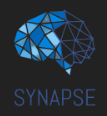

**Unsupervised Learning**

In this task, we will explore data dimensionality reduction and different  clustering methods.

We will work with the **Samsung Human Activity Recognition dataset**. The data comes from the accelerometers and gyros of Samsung mobile phones, the type of activity of a person with a phone in his pocket is also known - whether he walked, stood, lay, sat or walked up or down the stairs.

We imagine that the type of activity is unknown to us (unlabelled), and we will try to cluster people purely on the basis of available features.

# **Imports and Data loading**

Import some basic modules like numpy, pandas, seaborn, tqdm_notebook & matplotlib.pyplot

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mount your google drive

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mention the path of dataset, 4 paths for the 4 different txt files.

In [37]:
samsung_train_path = "/content/drive/MyDrive/synapse_w4/samsung_train.txt"
samsung_train_labels_path = "/content/drive/MyDrive/synapse_w4/samsung_train_labels.txt"

samsung_test_path = "/content/drive/MyDrive/synapse_w4/samsung_test.txt"
samsung_test_labels_path = "/content/drive/MyDrive/synapse_w4/samsung_test_labels.txt"

This time we will be using np.loadtxt() for reading our data. Code for the same has been given (do not modify), but we expect you to understand the working of it.

Ref.: https://www.geeksforgeeks.org/numpy-loadtxt-in-python/

In [38]:
X_train = np.loadtxt(samsung_train_path)
y_train = np.loadtxt(samsung_train_labels_path).astype(int)

X_test = np.loadtxt(samsung_test_path)
y_test = np.loadtxt(samsung_test_labels_path).astype(int)

Just to confirm that your data has been loaded properly, execute the below cell. You won't receive any error if everything is correct.

NOTE: If you get an Assertion error, then you probably did something wrong above.

In [39]:
# Checking dimensions
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

# **Pre-processing**

For clustering, we do not need a target vector, so we'll work with the combination of training and test samples. Merge *X_train* with *X_test*, and *y_train* with *y_test*.

Hint: 
1. Merge X_train and X_test into X {use [np.vstack()](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html)}
2. Merge y_train and y_test into y {use [np.hstack()](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html)}

In [40]:
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

Using numpy, print the unique values of the labels of the target class (i.e. "y").

Ref.: https://www.geeksforgeeks.org/python-numpy-np-unique-method/


In [41]:
unique = np.unique(y)
unique

array([1, 2, 3, 4, 5, 6])

Store the size (or number) of unique values of the labels of the target class (i.e. "y") in a variable named n_classes.

In [42]:
n_classes = len(unique)
n_classes

6

Here the 6 labels (or classes) correspond to:
- 1 - walking
- 2 - going up the stairs
- 3 - going down the stairs
- 4 - sitting
- 5 - standing
- 6 - lying down

So we wish to create 6 clusters where each cluster can represent one of the above activities.

Scale the sample (i.e. X) using [`StandardScaler()`](https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Dimensionality Reduction using PCA**

Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [44]:
from sklearn.decomposition import PCA

Reduce the number of dimensions using PCA, 

Hints:
1. Initialise instance of PCA and set *n_components* to 0.9 and *random_state* to 17.
2. Fit X_scaled over the PCA instance created
3. Transform X_scaled over the fitted PCA instance and store it in a variable named X_pca.

Theory: https://towardsdatascience.com/dimensionality-reduction-explained-5ae45ae3058e

Theory + Implementation.: https://youtu.be/OFyyWcw2cyM (Jump to timestamp - 13:50 for PCA implementaion)

In [45]:
pca = PCA(n_components = 0.9, random_state = 17)

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

Let's check the shape of X_pca.

In [46]:
X_scaled.shape

(10299, 561)

In [47]:
X_pca.shape

(10299, 65)

Shape of X was (10299, 561) i.e 561 dimensions

Shape of X_pca is (10299, 65) i.e. 65 dimenisons

Hence we have successfully reduced dimensions using PCA.

# **K-Means (Partition based clustering)**

Run the data clustering using the `KMeans` method, training the model on data with a reduced PCA dimension (i.e. X_pca). In this case, we will give a clue to look for exactly 6 clusters, but in general case we will not know how many clusters we should be searching.

Parameters for KMeans:

- **n_clusters** = n_classes (number of unique labels of the target class (i.e. 6))
- **n_init** = 100
- **random_state** = 17 (for the reproducibility of the result)

Other parameters should have default values.

In [48]:
from sklearn.cluster import KMeans

In [49]:
kmeans = KMeans(n_clusters = n_classes, n_init= 100, random_state= 17)

In [50]:
kmeans.fit(X_pca)

KMeans(n_clusters=6, n_init=100, random_state=17)

In [51]:
cluster_labels = kmeans.labels_

Major use of PCA is for visualization. So, let's visualize the 6 clusters using a scatter plot

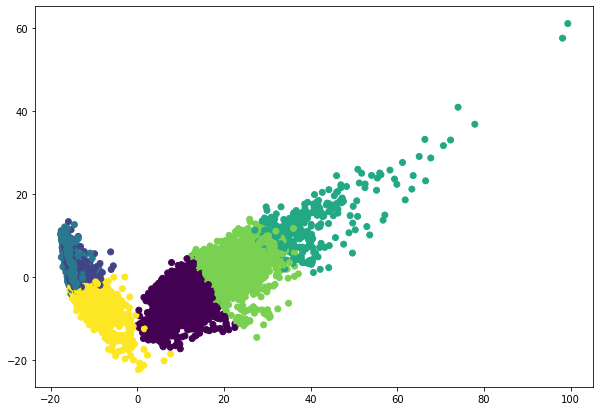

In [52]:
plt.figure(figsize = (10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis');

Now look at the correspondence between the cluster marks (i.e. cluster_labels) and the original class labels (i.e. y) and what kinds of activities the KMeans algorithm is confused at.

Ref.: [Pandas Crosstab](https://pbpython.com/pandas-crosstab.html)

In [53]:
pd.crosstab(cluster_labels, y, margins=True, margins_name="Total")

col_0,1,2,3,4,5,6,Total
row_0,,,,,,,
0,903,1241,320,1,0,5,2470
1,0,0,0,1235,1344,52,2631
2,0,0,0,91,0,1558,1649
3,78,5,196,0,0,0,279
4,741,296,890,0,0,0,1927
5,0,2,0,450,562,329,1343
Total,1722,1544,1406,1777,1906,1944,10299


It can be seen that kMeans does not distinguish activities very well. 

For example: Suppose there are 1722 walking activities. But those 1722 get splitted into multiple clusters rather than a single cluster of walking. Similarly for the rest of the activities. The clusters created are not disjoint. 

Similar to classification and regression metrics, we have some [clustering metrics](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) to evaluate performance.

We wll explore one of them: [adjusted_rand_index (ARI)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

In [54]:
from sklearn.metrics import adjusted_rand_score

# code to compute ARI for our KMeans clusters
ars = adjusted_rand_score(y, cluster_labels)
ars

0.4198070012602345

# **Optional Task:**


**Only the below 4 cells are optional. Agglomerative Clustering is not optional.**

Find optimal value of n_clusters for our KMeans model using the elbow method.

So, let's use the elbow method to select the optimal number of clusters. Parameters of the algorithm and the data we use are the same as before, we change only `n_clusters`.

- Loop n_clusters from 1 to 7 and fit a KMeans model over X_pca each time.
- Calculate inertia for each KMeans model and append it to a list. (Hint: inertia_list.append(np.sqrt(model_name.inertia_)) ) 
- Plot a line graph of inertia_list vs n_clusters value
- The optimal n_clusters value is the point at which the graph changes it steepness drastically.
- If everything is correct, you will find optimal n_clusters value to be 2 using elbow method.

In [55]:
inertia_list = []
for n_clusters in range(1, 8):
  k_means = KMeans(n_clusters, n_init = 100, random_state = 17)
  k_means.fit(X_pca)
  inertia_list.append(np.sqrt(k_means.inertia_))
print(inertia_list)

[2280.9554317530906, 1642.5366839830021, 1531.8045255008415, 1485.6418878723352, 1442.5620101068755, 1415.4345268912357, 1395.0814104520414]


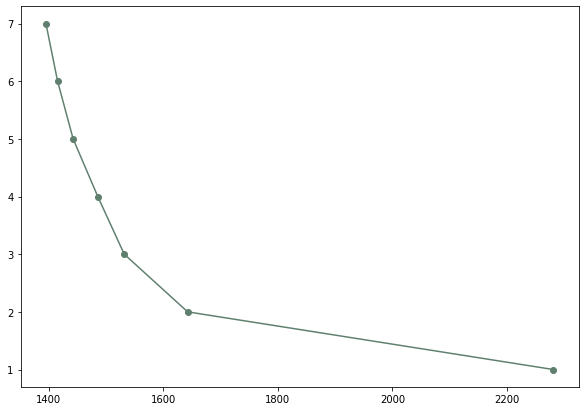

In [56]:
n_clusters_list = [1, 2, 3, 4, 5, 6, 7]

plt.figure(figsize = (10,7))
plt.plot(inertia_list, n_clusters_list, marker = 'o', color = '#60806f')
plt.show()

In [57]:
k_means = KMeans(n_clusters, n_init = 10, random_state = 17)
k_means.fit(X_pca)

cluster_labels = k_means.labels_
round(adjusted_rand_score(y, cluster_labels), 3)

0.436

So we see that KMeans clustering does not work well for our dataset. So let's try Agglomerative Clustering.

# **Agglomerative (Heirarichal clustering)**

Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [58]:
from sklearn.cluster import AgglomerativeClustering

 Create an instance of AgglomerativeClustering() and fit it over X_pca.
 
 NOTE: specify n_clusters equal to n_classes


In [59]:
ag = AgglomerativeClustering(n_clusters = n_classes)
ag.fit(X_pca)

AgglomerativeClustering(n_clusters=6)

Visualize the clusters

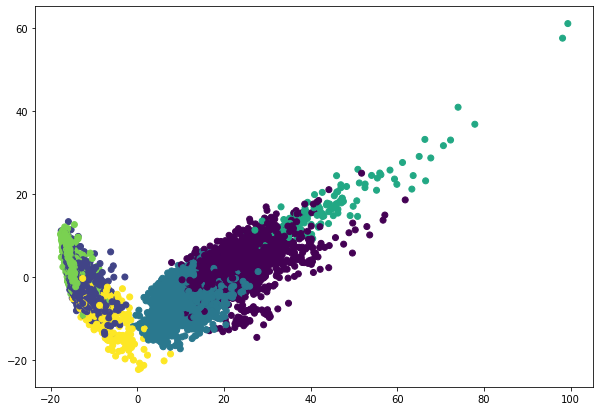

In [60]:
plt.figure(figsize = (10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ag.labels_,cmap='viridis');

Now look at the correspondence between the cluster marks and the original class labels and what kinds of activities the Agglomerative algorithm is confused at.

In [61]:
cluster_labels = ag.labels_
pd.crosstab(cluster_labels, y, margins=True, margins_name="Total")

col_0,1,2,3,4,5,6,Total
row_0,,,,,,,
0,800,337,1144,0,0,0,2281
1,0,0,0,1559,1832,74,3465
2,896,1207,138,0,0,0,2241
3,26,0,124,0,0,0,150
4,0,0,0,71,0,1604,1675
5,0,0,0,147,74,266,487
Total,1722,1544,1406,1777,1906,1944,10299


Similar to KMeans, calculate adjusted_rand_index (ARI) for Agglomerative Clustering

In [62]:
round(adjusted_rand_score(y, cluster_labels), 3)

0.494

Play with other hyperparameters for Agglomerative clustering like linkage, affinity, etc. Try to acheive maximum ARI.

Method: Tune the hyperparameters and select the hyperparameter set where ARI is maximum.

In [63]:
affinity = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkage = ['complete', 'average', 'single']

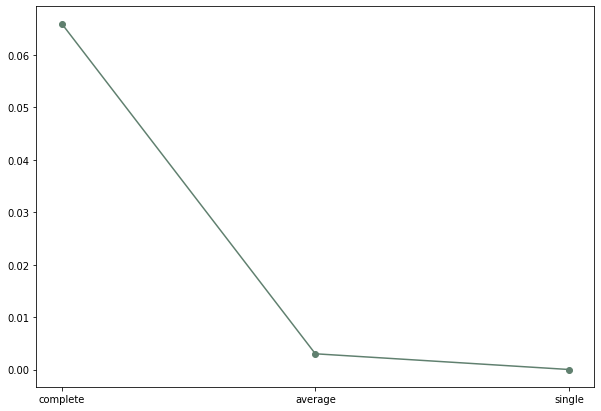

In [64]:
lin_list = []

for i in linkage:
  ag_ = AgglomerativeClustering(n_clusters = n_classes, linkage= i)
  ag_.fit(X_pca)
  cluster_labels = ag_.labels_
  lin_list.append(round(adjusted_rand_score(y, cluster_labels), 3))

plt.figure(figsize = (10,7))
plt.plot(linkage, lin_list, marker = 'o', color = '#60806f')
plt.show()

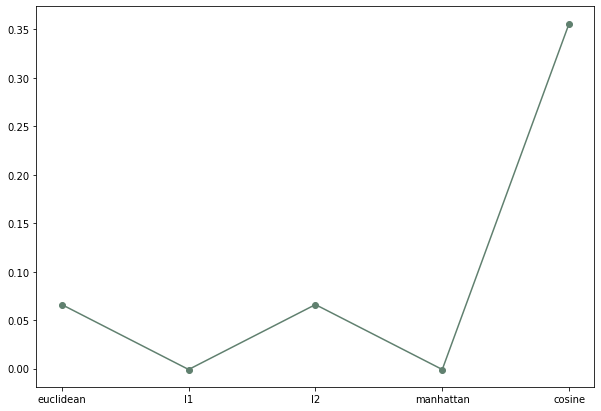

In [65]:
aff_list = []
for i in affinity:
  ag_ = AgglomerativeClustering(n_clusters = n_classes, linkage= 'complete', affinity = i)
  ag_.fit(X_pca)
  cluster_labels = ag_.labels_
  aff_list.append(round(adjusted_rand_score(y, cluster_labels), 3))

plt.figure(figsize = (10,7))
plt.plot(affinity, aff_list, marker = 'o', color = '#60806f')
plt.show()

In [66]:
ag_ = AgglomerativeClustering(n_clusters = n_classes, linkage= 'complete', affinity = 'cosine')
ag_.fit(X_pca)
cluster_labels = ag_.labels_
round(adjusted_rand_score(y, cluster_labels), 3)

# Therefore, linkage and affinity at their default values(euclidean and ward), give better results

0.356

**Conclusion**

Compare ARI values of KMeans and Agglomerative Clustering. Mention below which one is better among the two. Also, specify reasons to support your claim

ARI value of KMeans = **0.436**

ARI value of Agglomerative Clustering = **0.494**

This shows that Agglomerative Clustering is better than KMeans. KMeans can  sometimes be unpredictable, because even if we know and define the number of clusters, the initialized positions highly affect the cluster formation. But agglomerative  clustering is totally independent of any other variables, as it is only dependent on the distance between any two points.

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **DB-SCAN Clustering Algortihm**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

**DBSCAN**- Density Based Spatial Clustering of Applications with Noise.

It is a density-based clustering non-parametric algorithm. Given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbours), marking as outliers points that lie alone in low-density regions (whose nearest neighbours are too far away).
It is a very useful algorithm, and in my opinion, it is better than other clustering algorithms because it isn’t confined to a specific shape. For the data sets that are as vast and unpredictable, DBSCAN can perform better.
Another big advantage is the exclusion of outliers by rightly characterizing them as noise. In the given dataset, there will definitely be a lot of randomness, and if it is tried to be included in the clusters, can bring a lot of deviation from the required goal. In fact, here the number of clusters  don't need to be specified too, as the clusters are made based on the hyper-parameters.

There are 2 basic hyper-parameters in DBSCAN:
1.	**Epsilon(ε)**:
It defines the distance from the point in question (say ‘P’) to any point in its vicinity (say ‘Q’), in order to determine if point ‘Q’ is a neighbour of ‘P’.
It basically gives the radius of the circle in which, if point ‘Q’ lies, it becomes a neighbour.
The value of ‘ε’ needs to be chosen very carefully, as if it is too large, then most of the points will be labelled as the ‘neighbour’, and the number of clusters will reduce. However, if it is too small, then a large number of points will not be able to have a neighbour in their vicinity, and will become outliers.
2.	**MinPts**:
It gives the minimum number of points which neighbour the given data point ‘P’ within a radius of ‘ε’ (epsilon). 
This value, too, needs to be chosen carefully. If this is too small, then the boundary of the cluster will change, and the data points which are supposed to be outliers may change. In fact, if the clusters are close, then it might even merge.
However, if it is too large, it might limit the capacity of the cluster to hold enough data points. The number of clusters present will then increase drastically.

Based on these 2 hyper-parameters, there are 3 types of data-points:
1.	**Core point** (labelled ‘A’ in the diagram):
It is a point which has atleast ‘MinPts’ number of data points in its vicinity (a circle with the radius of ‘ε’).
2.	**Border point** (labelled ‘B’ and ‘C’ in the diagram):
It is a point which has atleast 1 core point in its vicinity, but less than the ‘MinPts’ number of points.
3.	**Noise point** (labelled ‘N’ in the diagram):
It is a point which doesn’t have any data point in its vicinity.

The algorithm first identifies the core points with the given values of ‘ε’ and ‘MinPts’. 
It then takes any one core point (say ‘A’) and assigns it a new cluster. Any other core points in its neighbourhood are assigned to the same cluster. This process goes on till all the core points connected in chain with the original point ‘A’ are assigned the same cluster. 
Next, the border points having a core point of the cluster in its neighbourhood is assigned to the cluster.
The algorithm then goes on to start this process with another core point to form a new cluster. Once all the clusters are formed, the remaining data points are noise points.

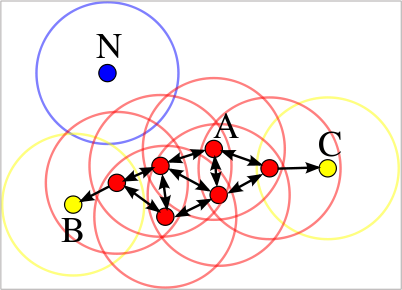

# **End of Task**

> ©DJS Synapse 2022 - 2023